# LGMVIP - Task 2 (Intermediate Level)
# Prediction using Decision Tree Algorithm

In [1]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.tree import plot_tree

In [2]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

In [3]:
#Input data 

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Printing a concise summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking for missing values
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [8]:
#Checking the correlation between features in the dataset
data.corr()

,Petal length,Petal Width,Sepal Length,Sepal Width
Petal length,1.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,1.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,1.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,1.000000


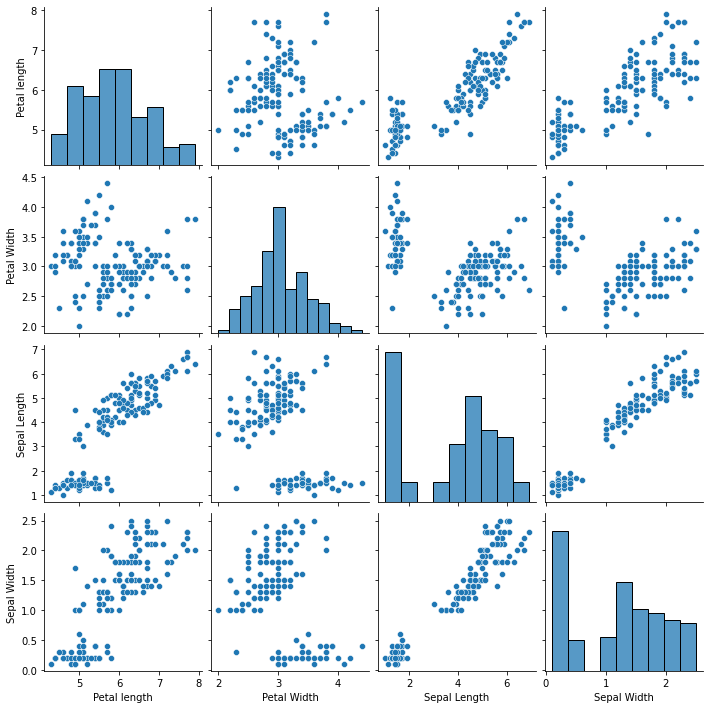

In [9]:
# Input data Visualization
sns.pairplot(data)

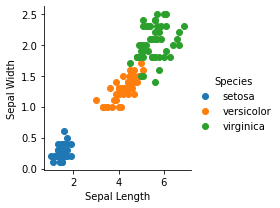

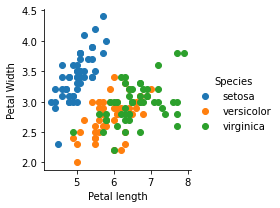

In [10]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

array([[<AxesSubplot:title={'center':'Petal length'}>,
        <AxesSubplot:title={'center':'Petal Width'}>],
       [<AxesSubplot:title={'center':'Sepal Length'}>,
        <AxesSubplot:title={'center':'Sepal Width'}>]], dtype=object)

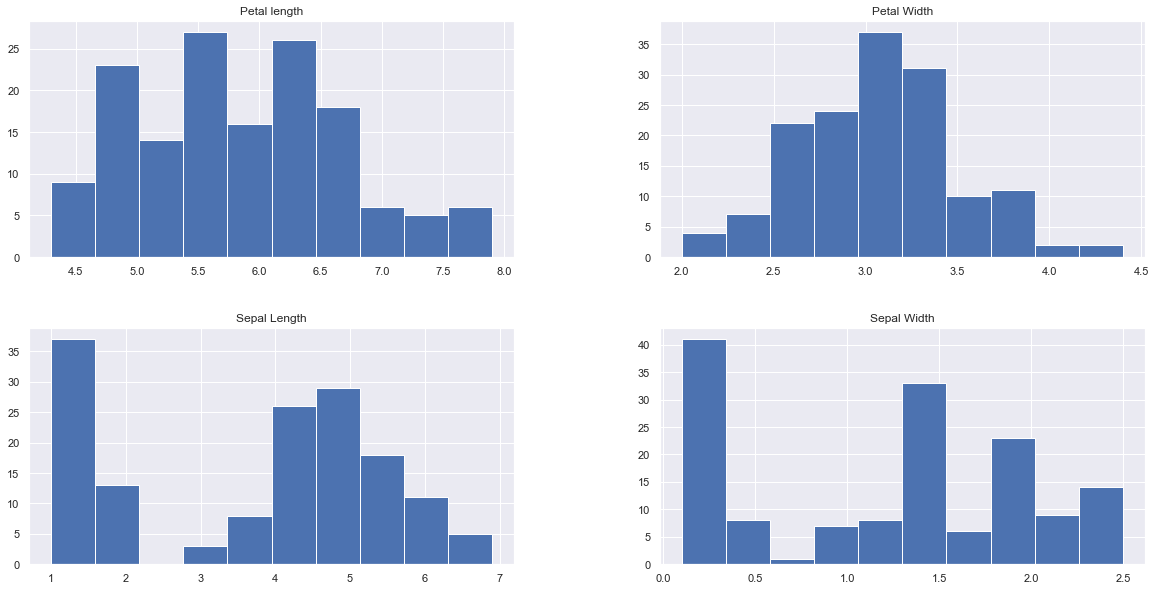

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
data.hist()

In [12]:
#Importing the required library
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Importing necessary libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


print('Decision Tree Classifer Created Successfully')

Decision Tree Classifer Created Successfully


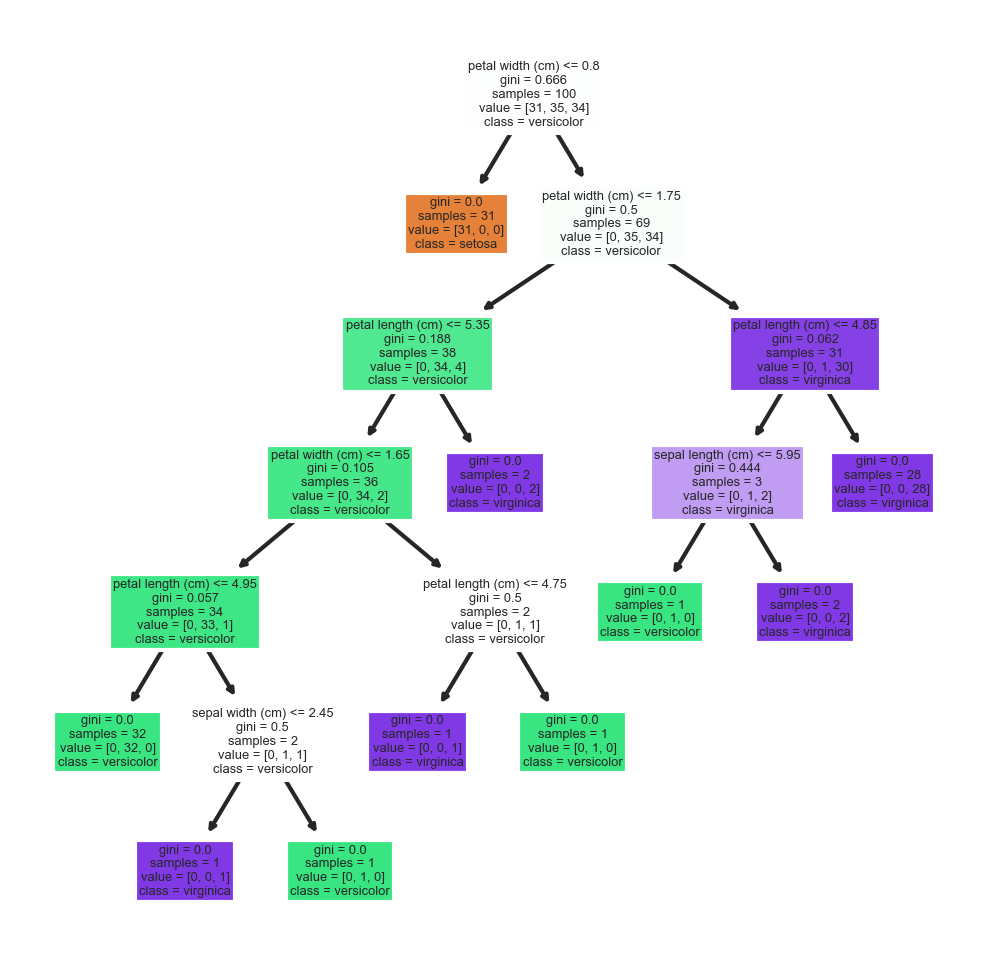

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree


a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = a, class_names = b, filled = True);

In [21]:
# Model Accuracy
print("Accuracy:",(sm.accuracy_score(y_test, y_pred))*100,'%')

Accuracy: 98.0 %
